# **Model Selection**

**Since the data i have is consist of multiple label i.e 'classes'. The Choice of model will be among models which are suitable for multi classification task. Altough, I have a variety of options to choose from. I selected very people XGBoost Classifier from Supervised Machine Learning and Keras with Tensforflow Backend from Deep Learning Framework.**

**let's discuss my choice in details**

#### **<font color='green'> 1. XGBoost </font>**

**XGBoost has become an algorithm of choice for most of the applied machine learning tasks and Kaggle competitions especially for structured or tabular data. XGBoost is an implementation of gradient boosted decision trees which is designed designed specifically for speed and performance.**

**This supervised learning algorithm specializes in accurately predicting a target variable by combining the estimates from a set of simpler and weaker models. So, its popularity amoung data science community and high accuracy was the main reason behind this choice**

#### **<font color='green'> 2. Keras </font>**

**Keras is a deep learning library built over Tensflow Framework. It is extremely fast and user friendly. Keras offers consistent & simple APIs, it minimizes the number of user actions required for common use cases**

**It's scalability, fast and easy to use environment with high accuracy make it my choice for Deep Learning**

In [2]:
#importing necessary modules
%matplotlib inline 
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
import pandas as pd
import numpy as np

#for supervised model
import xgboost as xgb
from xgboost import XGBClassifier

#for deep learning model
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import Dropout, Flatten
from keras.models import Sequential, load_model
from keras.utils import np_utils

In [3]:
pip install --upgrade tensorflow

     |████████████████████████████████| 516.2 MB 4.1 kB/s  eta 0:00:01     |█████████▉                      | 158.3 MB 45.5 MB/s eta 0:00:08�█████████████▋     | 429.8 MB 85.5 MB/s eta 0:00:024.5 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 3.0 MB/s  eta 0:00:01
     |████████████████████████████████| 454 kB 43.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 64.8 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 8.0 MB/s  eta 0:00:01
     |████████████████████████████████| 777 kB 69.3 MB/s eta 0:00:01
     |████████████████████████████████| 90 kB 13.5 MB/s eta 0:00:01
     |████████████████████████████████| 155 kB 55.2 MB/s eta 0:00:01
     |████████████████████████████████| 47 kB 7.3 MB/s  eta 0:00:01
     |████████████████████████████████| 77 kB 9.0 MB/s  eta 0:00:01
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=36044 sha256=01cee4b77f001abab98e3a7f7ba1ca825619ed60fa15435068eb5fba7ac2b773
  Stored in

In [4]:
#modules for model scaling and normalizing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

pt = PowerTransformer(method='box-cox')

scaler = MinMaxScaler()

In [5]:
pip install keras

     |████████████████████████████████| 170 kB 3.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
#after restarting kernel
import keras
import tensorflow as tf
from keras import backend as K

Using TensorFlow backend.


In [7]:
colnames = ['x acceleration', 'y acceleration', 'z acceleration', 'Label']

In [8]:
df1 = pd.read_csv(body, names=colnames, header=None)
df1.head()

,x acceleration,y acceleration,z acceleration,Label
0.0,1502,2215,2153,1
1.0,1667,2072,2047,1
2.0,1611,1957,1906,1
3.0,1601,1939,1831,1
4.0,1643,1965,1879,1


## For XGBoost Classifier

**Below I have employed Power Transformer to Scale data which was initially spread across very large range from 1600 to 3000 in all 3 dimensions. Since these features has very high Skewness and Variance which might create Bias and Noise in correctly classifying Labels I transformed data using Power Transformer to make it more guassian like**

In [9]:
#copying from source and droping un-identified label
dfn = df1.copy()

dfn.drop(dfn.loc[dfn['Label']==0].index, inplace=True)

In [10]:
#applying PT
dfn[['x acceleration', 'y acceleration', 'z acceleration']] = pt.fit_transform(dfn[
    ['x acceleration', 'y acceleration', 'z acceleration']])

In [11]:
features = ['x acceleration', 'y acceleration', 'z acceleration']
label = ['Label']
X = dfn[features]
Y = dfn[label]

In [12]:
#applying test train split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

**<font color='red'> Note: It is always best to read documentation of model, so you can select which options to modify for optimum model performance </font>**

In [14]:
clf = XGBClassifier(max_depth=12,learning_rate=0.1,n_estimators=500,silent=True,
                           objective='binary:logistic',
                           gamma=0, max_delta_step=0,subsample=1,colsample_bytree=1,colsample_bylevel=1,
                           reg_alpha=0,
                           reg_lambda=0,
                           scale_pos_weight=1,
                           seed=1,
                           missing=None)
clf.fit(X_train, Y_train.values.ravel(), eval_metric='auc', verbose=True) #also eval_metric = 'map' (mean average precision)
Yxg_pred = clf.predict(X_test)
xg_clf = round(clf.score(X_train, Y_train.values.ravel()) * 100, 2)
print("score:", xg_clf, "%")

score: 94.77 %


**Not bad our model has very good score over traing data, lets see how it score on unseen data**

In [15]:
#modules for model performance and hyper parameter tuning
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [19]:
Y_test.values.ravel()

array([7, 1, 7, ..., 7, 7, 7])

In [21]:
print(classification_report(Y_test.values.ravel(), Yxg_pred))

              precision    recall  f1-score   support

           1       0.95      0.96      0.95      6620
           2       0.18      0.08      0.11       172
           3       0.58      0.32      0.41      2316
           4       0.74      0.81      0.78      5345
           5       0.50      0.32      0.39       652
           6       0.17      0.05      0.08       572
           7       0.87      0.93      0.90     16822

   micro avg       0.84      0.84      0.84     32499
   macro avg       0.57      0.49      0.52     32499
weighted avg       0.82      0.84      0.83     32499



In [24]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test.values.ravel(), Yxg_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.20%


**pretty decent accuracy considering some of the labels has very similar x,y,z values**

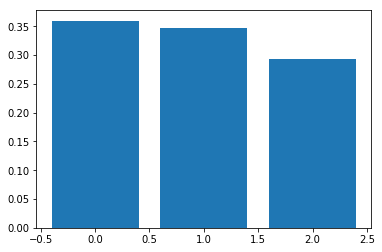

In [32]:
plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.show()

### **Hyper Parameters Tuning**



**what is hyper paramter tunung?**
Ans: hyperparameter tuning is the art of choosing a set of optimal hyperparameters for an algorithm. 

**how it helps?**
Our goal is to find optimal params which will be most suitable for our given problem and dataset, after finding those parameter the performance of our model tend to improve thus giving business a revenueable solution



In [33]:
##selecting params to use
gbm_param_grid = {'learning_rate': [0.01,0.1,0.5,0.9], 'n_estimators': [200],
                  'subsample': [0.3, 0.5, 0.9]}

In [34]:
esm = XGBClassifier()

grid_clf = GridSearchCV(estimator=esm,param_grid=gbm_param_grid,
scoring='accuracy', cv=4, verbose=1)
grid_clf.fit(X_train, Y_train.values.ravel())
print("Best parameters found: ",grid_clf.best_params_)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 24.9min finished


Best parameters found:  {'learning_rate': 0.5, 'n_estimators': 200, 'subsample': 0.9}


In [57]:
#lets tune more params
parameters = {'learning_rate': [0.5], 'n_estimators': [200],
              'subsample': [0.9], 'max_depth': (150, 155, 160)}

In [58]:
ess = XGBClassifier()

grid_clf = GridSearchCV(estimator=ess,param_grid=parameters,
                        scoring='accuracy', cv=4, verbose=1)
grid_clf.fit(X_train, Y_train.values.ravel())
print("Best parameters found: ", grid_clf.best_params_)

Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 49.8min finished


Best parameters found:  {'learning_rate': 0.5, 'max_depth': 150, 'n_estimators': 200, 'subsample': 0.9}


In [59]:
clf = XGBClassifier(max_depth=150,learning_rate=0.5,n_estimators=200,silent=True,
                           objective='binary:logistic',
                           gamma=0, max_delta_step=0,subsample=0.9,colsample_bytree=1,colsample_bylevel=1,
                           reg_alpha=0,
                           reg_lambda=0,
                           scale_pos_weight=1,
                           seed=1,
                           missing=None)
clf.fit(X_train, Y_train.values.ravel(), eval_metric='auc', verbose=True) #also eval_metric = 'map' (mean average precision)
Yxgb_pred = clf.predict(X_test)
xgb_clf = round(clf.score(X_train, Y_train.values.ravel()) * 100, 2)
print("score:", xgb_clf, "%")

score: 96.53 %


In [60]:
accuracy = accuracy_score(Y_test.values.ravel(), Yxgb_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 81.95%


**<font color='red'> So it is evident that sometime a tuned model can become overfit on training data and perform worst on test data </font>**

## **For Deep Learning Model**

In [39]:
dfsa = df1.copy()

### **Model with MinMax Scalar Transformation**

**This estimator scales and map each feature individually between values of 0 to 1**

In [40]:
dfsa[['x acceleration', 'y acceleration', 'z acceleration']] = scaler.fit_transform(dfsa[
    ['x acceleration', 'y acceleration', 'z acceleration']])

In [43]:
dfsa.drop(dfsa.loc[dfsa['Label']==0].index, inplace=True)

In [47]:
features = ['x acceleration', 'y acceleration', 'z acceleration']
label = ['Label']
X = dfsa[features]
Y = dfsa[label]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [49]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [51]:
#preparing data to input to Keras
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
y1 = np_utils.to_categorical(encoded_Y)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
encoder.fit(y_test)
encoded1_Y = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
y2 = np_utils.to_categorical(encoded1_Y)

In [52]:
y1.shape

(121871, 7)

In [58]:
n_out = y1.shape[1] 

In [59]:
n_out

7

#### <font color='green'> **Dense Layer** </font>
**Dense layer does 'output = activation(dot(input, kernel) + bias' operations on the input and return the output. The dense layer is a fully connected layer, meaning all the neurons in a layer are connected to those in the next layer**

#### <font color='green'> **Flatten Layer** </font>

**The Flatten layer is a utility layer that flattens an input of shape n * c * h * w to a simple vector output of shape n * (c*h*w)**

#### <font color='green'> **Relu Activation Function** </font>

**ReLU stands for rectified linear unit, and is a type of activation function. Mathematically, it is defined as y = max(0, x)**

#### <font color='green'> **Softmax Activation Functon** </font>

**the softmax function, also known as softargmax or normalized exponential function, is a function that takes as input a vector z of K real numbers, and normalizes it into a probability distribution consisting of K probabilities proportional to the exponentials of the input numbers. Used widely for multiclass classification problems like ours**

In [60]:
#defining the model
model_m = Sequential()
model_m.add(Dense(27, input_dim=3, activation='relu'))
model_m.add(Dense(100, activation='relu'))
model_m.add(Dense(100, activation='relu'))
model_m.add(Dense(100, activation='relu'))
model_m.add(Flatten())
model_m.add(Dense(n_out, activation='softmax'))

In [61]:
#lets see how our model works
model_m.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 27)                108       
_________________________________________________________________
dense_6 (Dense)              (None, 100)               2800      
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
flatten_1 (Flatten)          (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 7)                 707       
Total params: 23,815
Trainable params: 23,815
Non-trainable params: 0
__________________________________________________

#### <font color='green'> **Categorical crossentropy loss function** </font>

**Categorical crossentropy is a loss function that is used for single label categorization. This is when only one category is applicable for each data point.**

#### <font color='green'> **Adam optimization** </font>

**Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data**

In [62]:
model_m.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Enable validation to use ModelCheckpoint and EarlyStopping callbacks.
model_m.fit(x_train, y1, batch_size=4000, epochs=10)

Epoch 1/10
31/31 [==============================] - 2s 67ms/step - loss: 1.6228 - accuracy: 0.4983
Epoch 2/10
31/31 [==============================] - 2s 54ms/step - loss: 1.3195 - accuracy: 0.5146
Epoch 3/10
31/31 [==============================] - 2s 54ms/step - loss: 1.2488 - accuracy: 0.5177
Epoch 4/10
31/31 [==============================] - 2s 49ms/step - loss: 1.0436 - accuracy: 0.6731
Epoch 5/10
31/31 [==============================] - 2s 49ms/step - loss: 0.9233 - accuracy: 0.6941
Epoch 6/10
31/31 [==============================] - 2s 49ms/step - loss: 0.8751 - accuracy: 0.7172
Epoch 7/10
31/31 [==============================] - 2s 48ms/step - loss: 0.8362 - accuracy: 0.7346
Epoch 8/10
31/31 [==============================] - 2s 49ms/step - loss: 0.8017 - accuracy: 0.7457
Epoch 9/10
31/31 [==============================] - 1s 46ms/step - loss: 0.7773 - accuracy: 0.7513
Epoch 10/10
31/31 [==============================] - 2s 49ms/step - loss: 0.7504 - accuracy: 0.7625


In [64]:
score, acc = model_m.evaluate(x_test, y2, batch_size=4000)
print('Test score:', score)
print('Test accuracy:', acc)

11/11 [==============================] - 0s 10ms/step - loss: 0.7387 - accuracy: 0.7612
Test score: 0.7387076020240784
Test accuracy: 0.7612002491950989


### **Implementing Power Transformer**

**Not lets see how PT effect our DL Model**

In [137]:
dfn = df1.copy()

In [138]:
dfn.drop(dfn.loc[dfn['Label']==0].index, inplace=True)

In [140]:
dfn[['x acceleration', 'y acceleration', 'z acceleration']] = pt.fit_transform(dfn[
    ['x acceleration', 'y acceleration', 'z acceleration']])

In [141]:
dfn.head()

,x acceleration,y acceleration,z acceleration,Label,subject
0.0,-8.878885,-4.301991,1.0,1,1
1.0,-5.585515,-8.696853,1.0,1,1
2.0,-6.746463,-12.779120,1.0,1,1
3.0,-6.949092,-13.469317,1.0,1,1
4.0,-6.088519,-12.477086,1.0,1,1


In [142]:
features = ['x acceleration', 'y acceleration', 'z acceleration']
label = ['Label']
Xp = dfn[features]
Yp = dfn[label]

In [144]:
x_tp, x_tep, y_tp, y_tep = train_test_split(Xp, Yp, test_size=0.20, random_state=42)
x_tp = x_tp.astype('float32')
x_tep = x_tep.astype('float32') 

In [145]:

encoder.fit(y_tp)
encoded_Yp = encoder.transform(y_tp)
# convert integers to dummy variables (i.e. one hot encoded)
yp = np_utils.to_categorical(encoded_Yp)

np = yp.shape[1]

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [146]:
encoder.fit(y_tep)
encoded_Yep = encoder.transform(y_tep)
# convert integers to dummy variables (i.e. one hot encoded)
yep = np_utils.to_categorical(encoded_Yep)

#### <font color='green'> **sigmoid activation function** </font>

**The input to the function is transformed into a value between 0.0 and 1.0**

#### <font color='green'> **tanh activation function** </font>

**tanh is also like logistic sigmoid but better. The range of the tanh function is from (-1 to 1). tanh is also sigmoidal (s - shaped)**

In [149]:
model_n = Sequential()
model_n.add(Dense(36, input_dim=3, activation='relu'))
model_n.add(Activation('tanh'))
model_n.add(Dropout(0.2))
model_n.add(Dense(90, activation='sigmoid'))
model_n.add(Dense(90, activation='tanh'))
model_n.add(Dropout(0.5))
model_n.add(Dense(49, activation='relu'))
model_n.add(Dense(np, activation='softmax'))

In [150]:
model_n.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 36)                144       
_________________________________________________________________
activation_3 (Activation)    (None, 36)                0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 36)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 90)                3330      
_________________________________________________________________
dense_30 (Dense)             (None, 90)                8190      
_________________________________________________________________
dropout_7 (Dropout)          (None, 90)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 49)               

In [151]:
model_n.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
check = model_n.fit(x_tp, yp, batch_size=128, epochs=10,
                      validation_split=0.1, verbose=1)

Epoch 1/10
915/915 [==============================] - 6s 6ms/step - loss: 0.7193 - accuracy: 0.7939 - val_loss: 0.5953 - val_accuracy: 0.8269
Epoch 2/10
915/915 [==============================] - 6s 6ms/step - loss: 0.6176 - accuracy: 0.8247 - val_loss: 0.5891 - val_accuracy: 0.8273
Epoch 3/10
915/915 [==============================] - 5s 6ms/step - loss: 0.6094 - accuracy: 0.8250 - val_loss: 0.5865 - val_accuracy: 0.8268
Epoch 4/10
915/915 [==============================] - 6s 6ms/step - loss: 0.6037 - accuracy: 0.8258 - val_loss: 0.5838 - val_accuracy: 0.8280
Epoch 5/10
915/915 [==============================] - 5s 6ms/step - loss: 0.5987 - accuracy: 0.8265 - val_loss: 0.5767 - val_accuracy: 0.8282
Epoch 6/10
915/915 [==============================] - 6s 6ms/step - loss: 0.5984 - accuracy: 0.8259 - val_loss: 0.5768 - val_accuracy: 0.8285
Epoch 7/10
915/915 [==============================] - 6s 7ms/step - loss: 0.5956 - accuracy: 0.8264 - val_loss: 0.5749 - val_accuracy: 0.8276
Epoch 

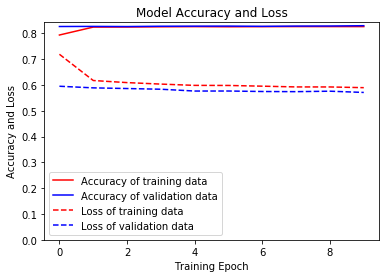

In [152]:
plt.figure(figsize=(6, 4))
plt.plot(check.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(check.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(check.history['loss'], 'r--', label='Loss of training data')
plt.plot(check.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [177]:
y_pred = np.argmax(model_n.predict(x_tep), axis=1)
y_true = np.argmax(yep, axis=1)

In [179]:
transform = ['Working at Computer', 'Standing Up, Walking', 'Standing', 'Walking', 'Going Up\Down Stairs',
             'Walking and Talking with Someone', 'Talking while Standing']

print(classification_report(y_true, y_pred, target_names=transform))

                                  precision    recall  f1-score   support

             Working at Computer       0.94      0.95      0.94      6620
            Standing Up, Walking       0.00      0.00      0.00       172
                        Standing       0.00      0.00      0.00      2316
                         Walking       0.71      0.83      0.77      5345
            Going Up\Down Stairs       0.37      0.06      0.10       652
Walking and Talking with Someone       0.00      0.00      0.00       572
          Talking while Standing       0.83      0.96      0.89     16822

                        accuracy                           0.83     32499
                       macro avg       0.41      0.40      0.39     32499
                    weighted avg       0.74      0.83      0.78     32499



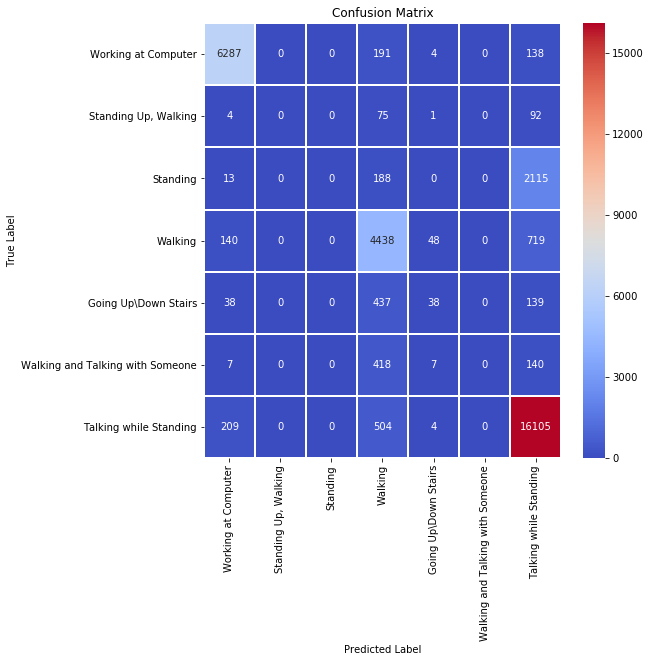

In [180]:
matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(matrix, cmap='coolwarm', linecolor='white', linewidths=1, xticklabels=transform,
                yticklabels=transform, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

**So it is true that due to high variance and skewness in data, certain labels were almost not identified by the both XGB and Keras models**

### **Conclusion**

**The models were sucessfully able to identify Human Posture with 84.20% accuracy for XGB Classifier and 83% for Keras model. This model can be further improved by adding new features like timeperiod and frequency of each activity or by adding more sensors points. Also a deep learning model with more layers or further tuned XGB or LightGBM model can provide better accuracy**

[section title](#Model-Selection) 